<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---

>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.

In [20]:
#pip install pandas

In [21]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.217391
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,15.238095
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,14.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.052632


> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [22]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
df

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,17.217391,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,15.238095,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,14.095238,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,15.052632,4,2016,12,0,0,0,1


> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [23]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

> a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

In [24]:
print(X_train.shape,y_train.shape)

(1000, 11) (1000,)


En el conjunto de entrenamiento X_train, se cuenta con 11 características del clima, por fila, asociadas a un día específico en India. Lo anterior, se repite para 1000 días, obteniendo así una matriz (1000, 11). La etiqueta (y_label) fue quitada (y guardada en y_train) en un paso anterior para la posterior predicción del clima, dadas las 11 características climáticas del día anterior. Lo mismo sucede con el conjunto X_val.

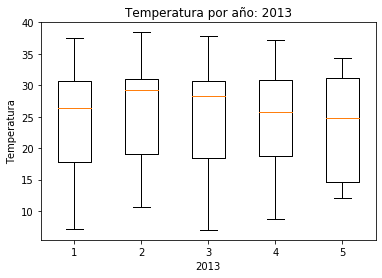

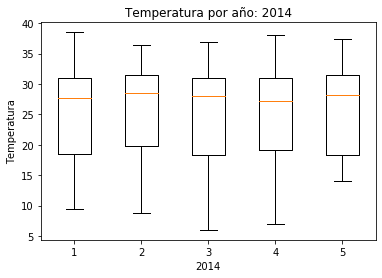

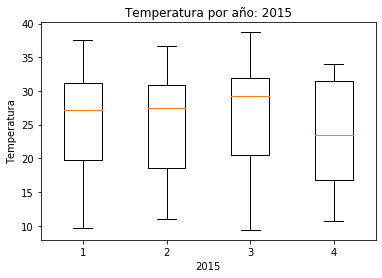

------------------   º   --------------------


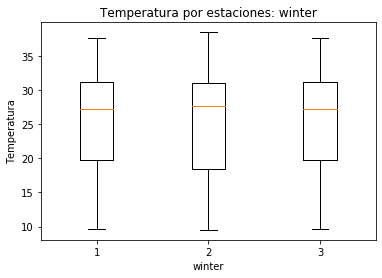

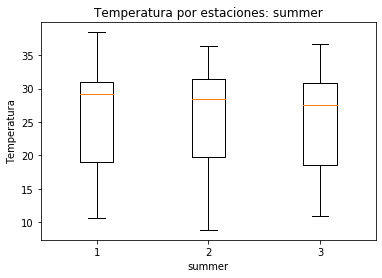

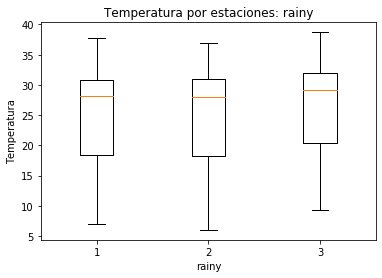

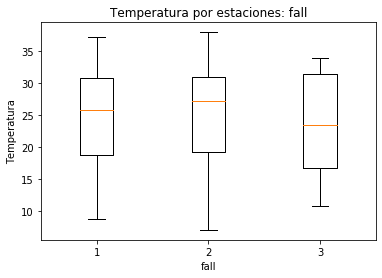

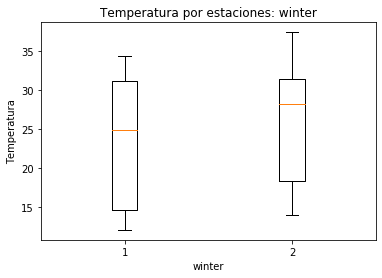

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#1.winter | 2.summer | 3.rainy | 4.fall | 5.winter

#2013
plt.boxplot([y_train[:59], y_train[59:151], y_train[151:243], y_train[243:334], y_train[334:365]])
plt.xlabel('2013')
plt.ylabel('Temperatura')
plt.title('Temperatura por año: 2013')
plt.show()

#2014
plt.boxplot([y_train[365:424], y_train[424:516], y_train[516:608], y_train[608:699], y_train[699:730]])
plt.xlabel('2014')
plt.ylabel('Temperatura')
plt.title('Temperatura por año: 2014')
plt.show()

#2015
plt.boxplot([y_train[730:789], y_train[789:881], y_train[881:973], y_train[973:1001]])
plt.xlabel('2015')
plt.ylabel('Temperatura')
plt.title('Temperatura por año: 2015')
plt.show()


#---- comparacion estaciones
print("------------------   º   --------------------")

#1. 2013 | 2. 2014 | 3. 2015

#winter
plt.boxplot([y_train[730:789], y_train[365:424], y_train[730:789]])
plt.xlabel('winter')
plt.ylabel('Temperatura')
plt.title('Temperatura por estaciones: winter')
plt.show()

#summer
plt.boxplot([y_train[59:151], y_train[424:516], y_train[789:881]])
plt.xlabel('summer')
plt.ylabel('Temperatura')
plt.title('Temperatura por estaciones: summer')
plt.show()

#rainy
plt.boxplot([y_train[151:243], y_train[516:608], y_train[881:973]])
plt.xlabel('rainy')
plt.ylabel('Temperatura')
plt.title('Temperatura por estaciones: rainy')
plt.show()

#fall
plt.boxplot([y_train[243:334], y_train[608:699], y_train[973:1001]])
plt.xlabel('fall')
plt.ylabel('Temperatura')
plt.title('Temperatura por estaciones: fall')
plt.show()

#winter
plt.boxplot([y_train[334:365], y_train[699:730]])
plt.xlabel('winter')
plt.ylabel('Temperatura')
plt.title('Temperatura por estaciones: winter')
plt.show()

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?


In [26]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model





Ellipsis

Porque cada nodo del arbol utiliza los mismos datos para crear un valor de referencia

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

RMSE train=  0.0
RMSE val=  2.5096679928377195


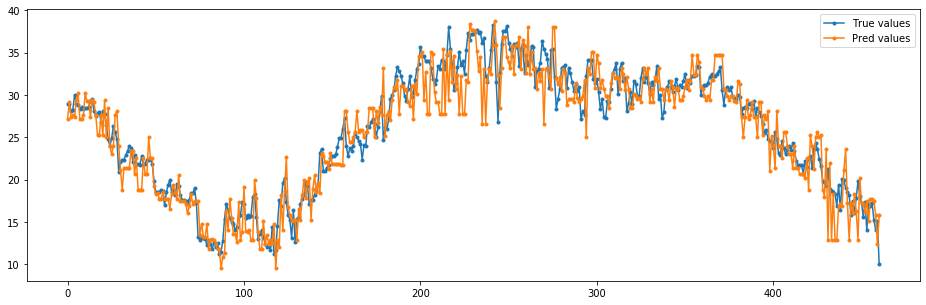

Model 1,200
RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


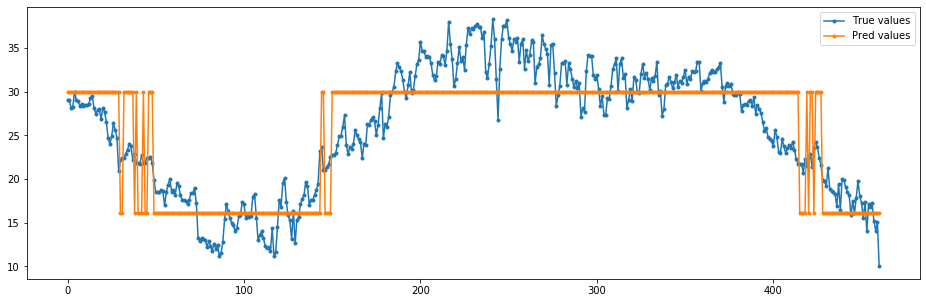

Model 1,600
RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


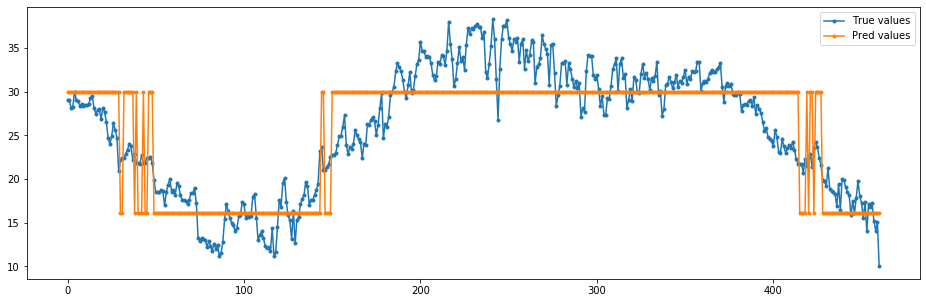

Model 1,1000
RMSE train=  3.567413761517928
RMSE val=  3.922173970900395


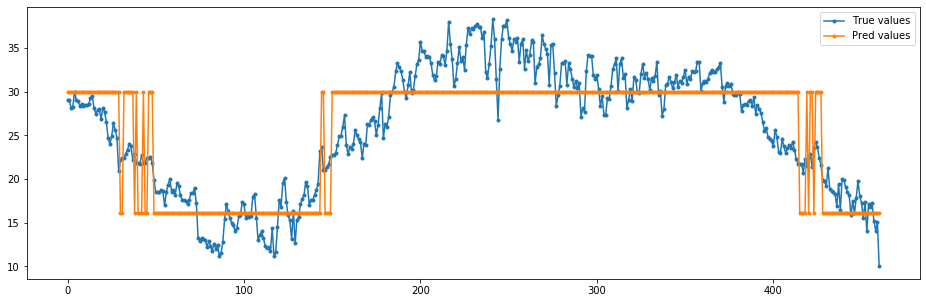

Model 3,200
RMSE train=  2.1468638280736316
RMSE val=  2.1380012259195724


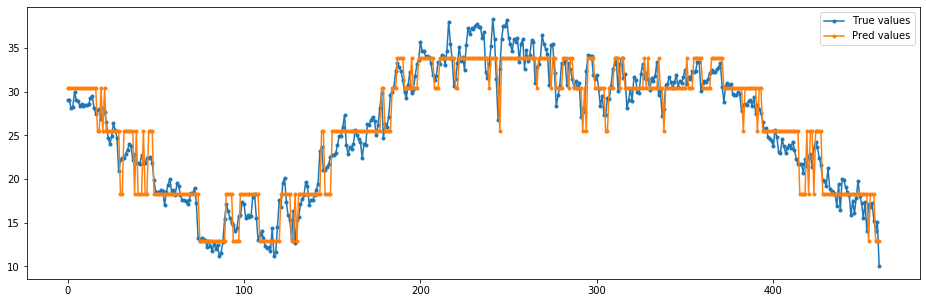

Model 3,600
RMSE train=  2.8732430042395802
RMSE val=  2.875516249381712


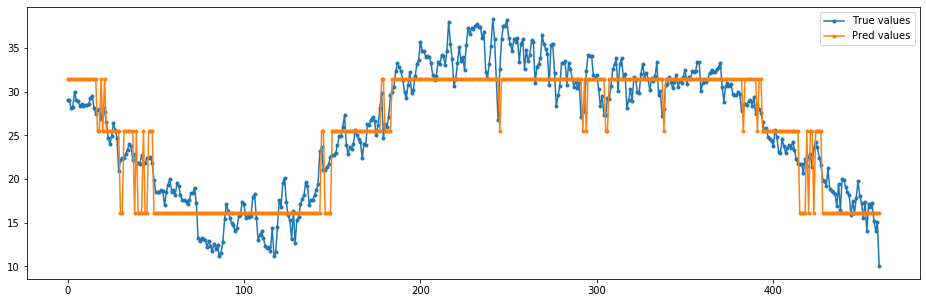

Model 3,1000
RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


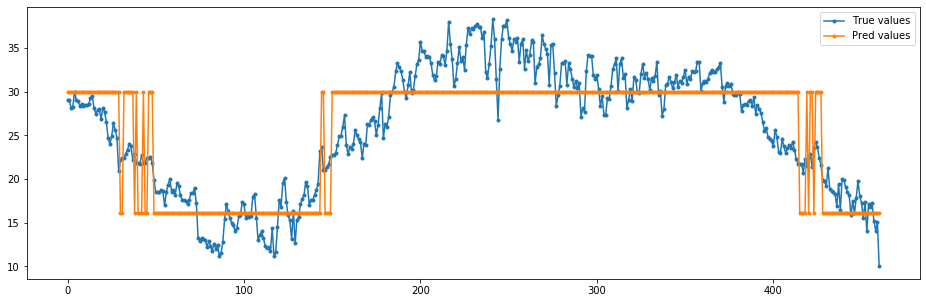

Model 5,200
RMSE train=  2.0795329907238296
RMSE val=  2.0802295898361947


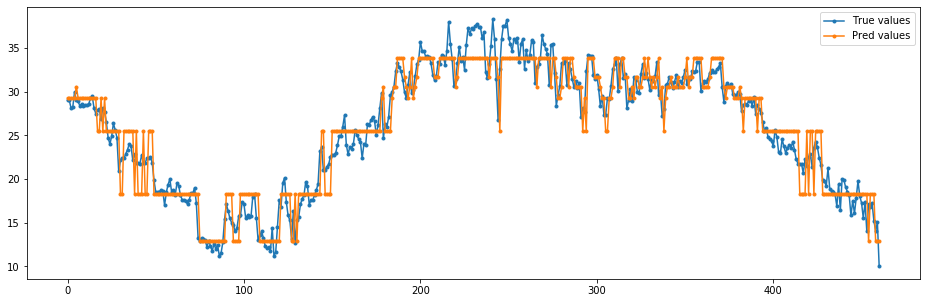

Model 5,600
RMSE train=  2.8732430042395802
RMSE val=  2.8755162493817115


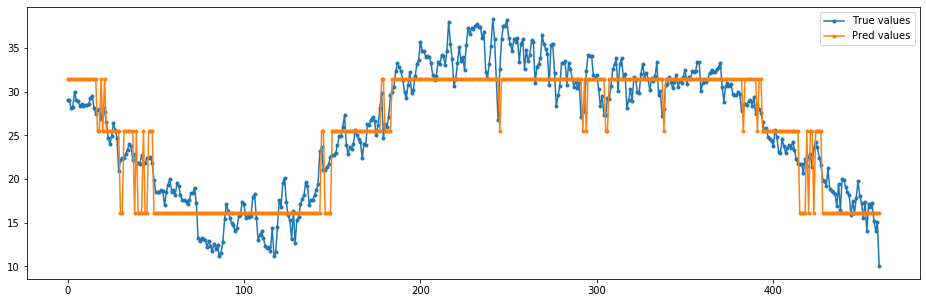

Model 5,1000
RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


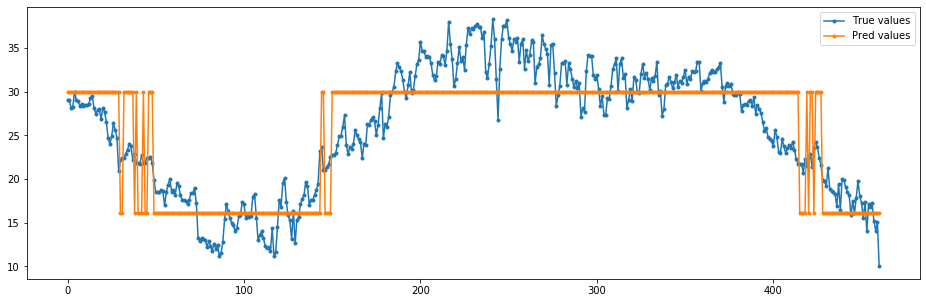

Model 7,200
RMSE train=  2.0795329907238296
RMSE val=  2.0802295898361938


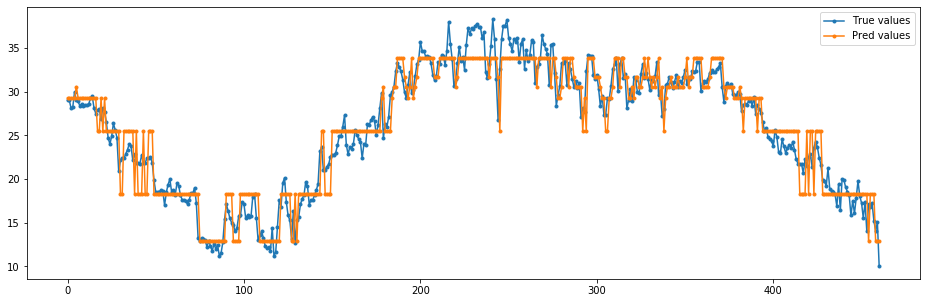

Model 7,600
RMSE train=  2.8732430042395802
RMSE val=  2.875516249381712


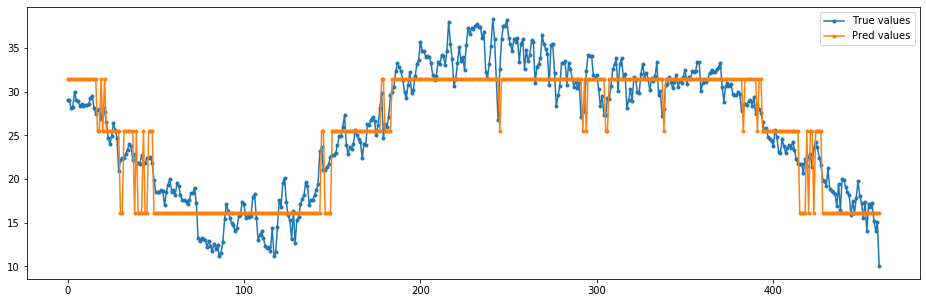

Model 7,1000
RMSE train=  3.567413761517928
RMSE val=  3.922173970900395


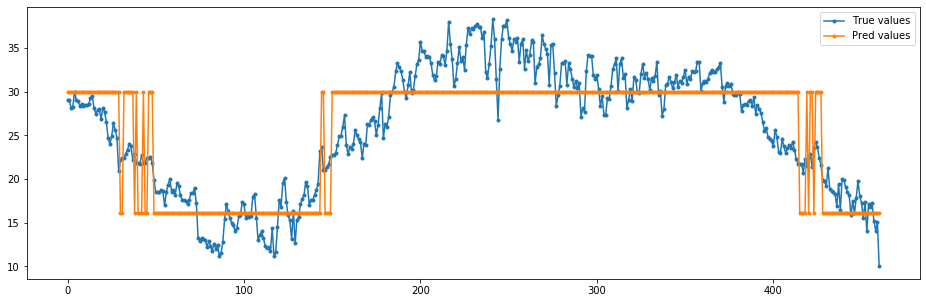

Model 9,200
RMSE train=  2.0795329907238296
RMSE val=  2.0802295898361947


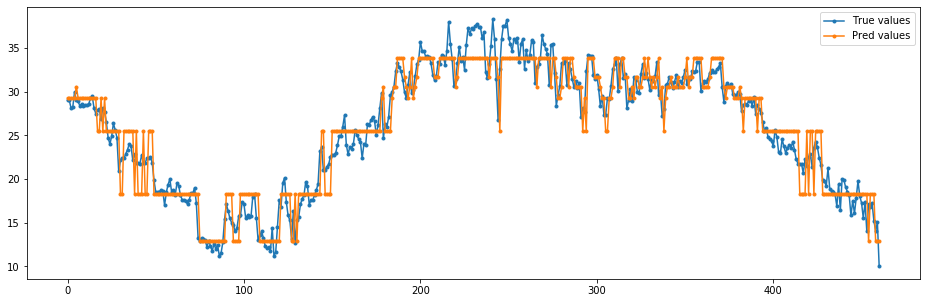

Model 9,600
RMSE train=  2.8732430042395802
RMSE val=  2.875516249381713


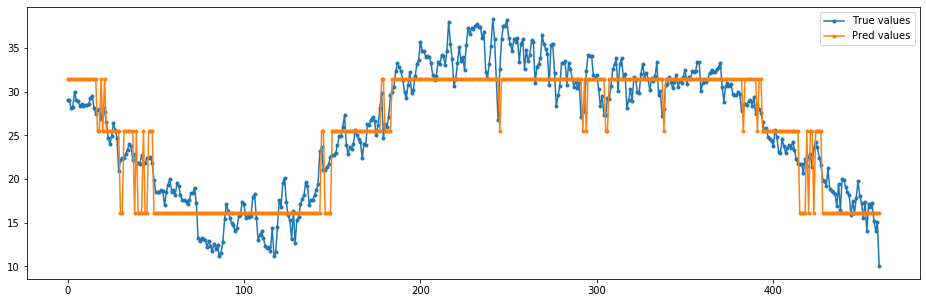

Model 9,1000
RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


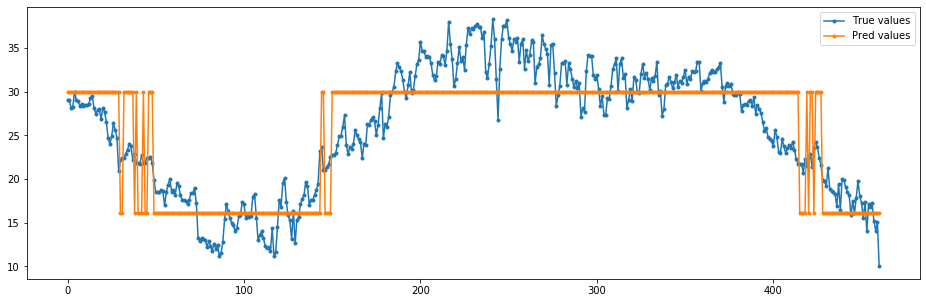

Model 11,200
RMSE train=  2.0795329907238296
RMSE val=  2.0802295898361938


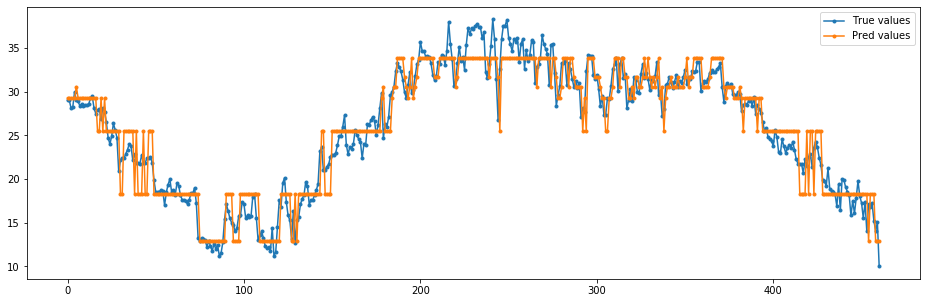

Model 11,600
RMSE train=  2.8732430042395802
RMSE val=  2.875516249381713


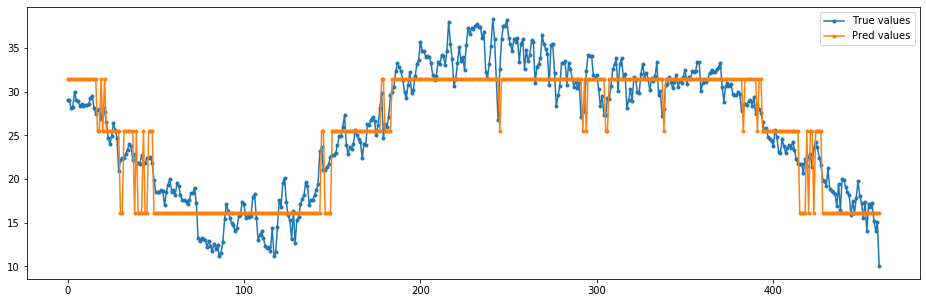

Model 11,1000
RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


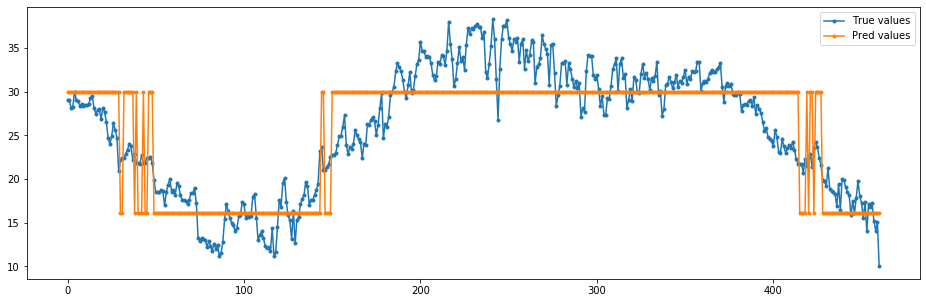

In [27]:
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()


P1 = np.arange(1, X_train.shape[1] + 1, 2 )
P2 = np.arange(200, X_train.shape[0] + 1 , 400 ) 

for i in P1:
    for j in P2:
        model_reg = Tree()
        model_reg.set_params(max_depth = i, min_samples_split = j)
        model_reg.fit(X_train,y_train)
        y_train_hat = model_reg.predict(X_train)
        y_val_hat = model_reg.predict(X_val)
        print("Model "+str(i)+","+str(j))
        print("RMSE train= ",RMSE(y_train,y_train_hat))
        print("RMSE val= ",RMSE(y_val,y_val_hat))
        plt.figure(figsize=(8,5))
        plt.plot(y_val, '.-' ,label="True values")
        plt.plot(y_val_hat, '.-' ,label="Pred values")
        plt.legend()
        plt.show()



Debido a lo anterior, el mejor Modelo corresponde al del arbol regularizado con parametros max_depths = 5,min_samples= 200

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

RMSE train=  0.7711019724713327
RMSE val=  1.7986726531365451


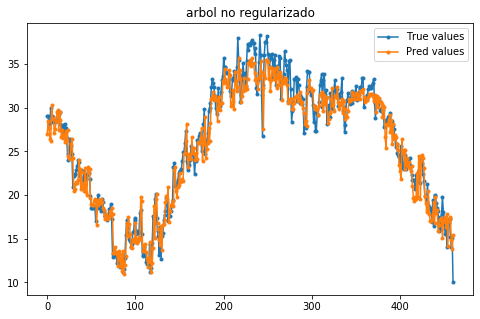

RMSE train=  1.89572650220771
RMSE val=  1.8295414875527514


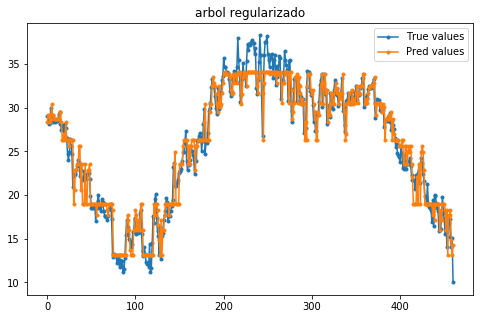

In [28]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(base_estimator=Tree(), n_estimators=10, n_jobs=-1)

model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.title("arbol no regularizado")
plt.legend()
plt.show()

model = BaggingRegressor(base_estimator=Tree(max_depth = 5, min_samples_split = 200), n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.title("arbol regularizado")
plt.legend()
plt.show()

NO se observa overfitting

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

RMSE train=  0.19285219590208527
RMSE val=  1.9586573582221691


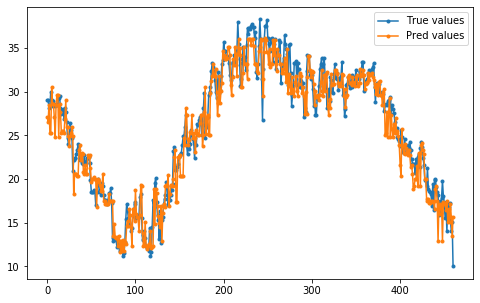

RMSE train=  1.7338804038599926
RMSE val=  1.7346154581684894


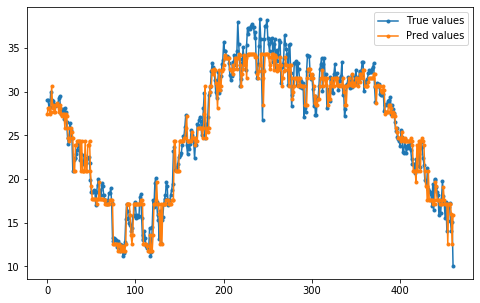

In [29]:
from sklearn.ensemble import AdaBoostRegressor


model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()



model = AdaBoostRegressor(base_estimator=Tree(max_depth = 5, min_samples_split = 200), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

/Users/fandrades/anaconda3/envs/erre/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMSE train=  0.7638349310631788
RMSE val=  1.7999010340353723


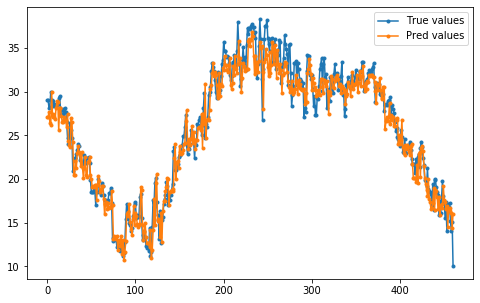

In [30]:
from sklearn.ensemble import RandomForestRegressor
model_unr = RandomForestRegressor(n_estimators=10, n_jobs=-1,oob_score = True)
... #define your regularized random forest model
model_unr.fit(X_train,y_train)
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

In [31]:
oob_error = model_unr.oob_score_
val_error = model_unr.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.7764152090253963
Val error:  0.9354663385271066


> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos. 

In [32]:
def combine_predictions(predictions):
    return sum(predictions)/len(predictions)
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))

RMSE val=  1.716064315632281


> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

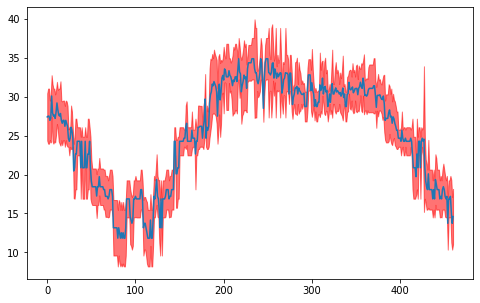

In [33]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

RMSE test = 1.885734640838456


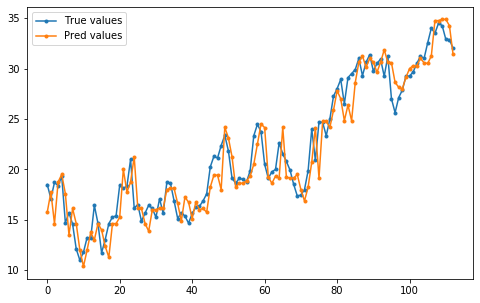

In [34]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

n_zero = np.zeros(113,dtype=int)

df["season_fall"] = n_zero
df["season_rainy"] = n_zero


y_test = df.pop("y_value").values  
X_test = df.values 

#adaboost regresor unregularized

model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model.fit(X_train,y_train)
#y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
#print("RMSE train= ",RMSE(y_train,y_train_hat))
#print("RMSE val= ",RMSE(y_val,y_val_hat))
print("RMSE test =", RMSE(y_test,y_test_hat))
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test, '.-' ,label="True values")
plt.plot(y_test_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:

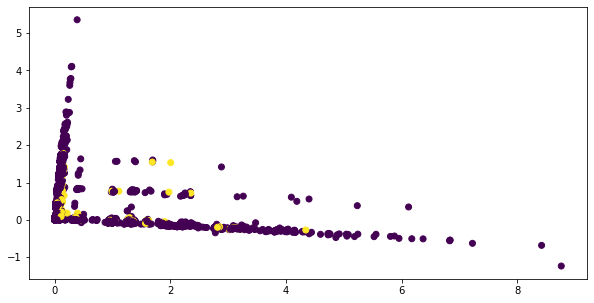

In [35]:
df = pd.read_csv("Train_data.csv")
y = df.pop("harassment").values
x = df.values
df2 = pd.read_csv("Test_input.csv")
x_val = df2.values

texts = df.pop("tweet_content").values
textsval = df2.pop("tweet_content").values
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
texts_train = [word_extractor(text) for text in texts]
texts_val = [word_extractor(text) for text in textsval]

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=y)
plt.show()

In [36]:
from  sklearn.metrics import f1_score


from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(features_train,y)

y_train_hat = model_unr.predict(features_train)
y_val_hat = model_unr.predict(features_val)
y_pred = [int(text) for text in y_train_hat]
y_pred_val = [int(text) for text in y_val_hat]
print(f1_score(y, y_pred, average='binary'))

P1 = np.arange(2, features_train.shape[1] + 1, 2000 )
P2 = np.arange(2, features_train.shape[0] + 1 , 1000 ) 

for i in P1:
    for j in P2:
        model_reg = Tree()
        model_reg.set_params(max_depth = i, min_samples_split = j)
        model_reg.fit(features_train,y)
        y_train_hat = model_reg.predict(features_train)
        y_val_hat = model_reg.predict(features_val)
        y_pred = [int(text) for text in y_train_hat]
        y_pred_val = [int(text) for text in y_val_hat]
        print("Model "+str(i)+","+str(j))
        print(f1_score(y, y_pred, average='binary'))

0.9945054945054945
Model 2,2
0.0
Model 2,1002
0.0
Model 2,2002
0.0
Model 2,3002
0.0
Model 2,4002
0.0
Model 2,5002
0.0
Model 2002,2
0.9945054945054945
Model 2002,1002
0.25990491283676703
Model 2002,2002
0.25990491283676703
Model 2002,3002
0.25990491283676703
Model 2002,4002
0.25990491283676703
Model 2002,5002
0.0
Model 4002,2
0.9945054945054945
Model 4002,1002
0.25990491283676703
Model 4002,2002
0.25990491283676703
Model 4002,3002
0.25990491283676703
Model 4002,4002
0.25990491283676703
Model 4002,5002
0.0
Model 6002,2
0.9945054945054945
Model 6002,1002
0.25990491283676703
Model 6002,2002
0.25990491283676703
Model 6002,3002
0.25990491283676703
Model 6002,4002
0.25990491283676703
Model 6002,5002
0.0
Model 8002,2
0.9945054945054945
Model 8002,1002
0.25990491283676703
Model 8002,2002
0.25990491283676703
Model 8002,3002
0.25990491283676703
Model 8002,4002
0.25990491283676703
Model 8002,5002
0.0
Model 10002,2
0.9945054945054945
Model 10002,1002
0.25990491283676703
Model 10002,2002
0.259904912

En base a lo anterior, se decide utilizar el modelo regularized tree con parametros  max_depth = 14002, min_samples_split = 2

In [37]:
model_reg = Tree()
model_reg.set_params(max_depth = 14002, min_samples_split = 2)
model_reg.fit(features_train,y)
y_train_hat = model_reg.predict(features_train)
y_val_hat = model_reg.predict(features_val)
y_pred = [int(text) for text in y_train_hat]
y_pred_val = [int(text) for text in y_val_hat]
print("Model "+str(i)+","+str(j))
print(f1_score(y, y_pred, average='binary'))
entrega = np.array(y_pred_val)
print(entrega.shape)



lista = [x for x in range(1, 1786)]

print(np.array(lista).shape)

percentile_list = pd.DataFrame(
    {   'id': lista,
        'harassment': y_pred_val,

    })

print(percentile_list)

percentile_list.to_csv('file.csv',index=False)

Model 14002,5002
0.9945054945054945
(1785,)
(1785,)
        id  harassment
0        1           0
1        2           0
2        3           0
3        4           0
4        5           0
...    ...         ...
1780  1781           0
1781  1782           0
1782  1783           0
1783  1784           0
1784  1785           0

[1785 rows x 2 columns]


* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18